# **Statistički pregled SuperSport HNL u sezoni 2024./2025.**

*Tonći Radovniković*

## Učitavanje potrebnih biblioteka i postavljanje URL-a za web scrapanje stranica HNL-a te upisivanje podataka u CSV datoteke

* Ljestvica
* Rezultati
* Strijelci
* Kartoni
* Gledatelji

In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

# Function to scrape tables using Selenium
def scrape_dynamic_table(url, table_xpath, output_file):
    # Set up Selenium WebDriver
    service = Service(ChromeDriverManager().install())
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")  # Run in headless mode
    driver = webdriver.Chrome(service=service, options=options)

    try:
        # Open the URL
        driver.get(url)
        time.sleep(5)  # Wait for dynamic content to load

        # Find the table
        table = driver.find_element(By.XPATH, table_xpath)

        # Extract table rows
        rows = table.find_elements(By.TAG_NAME, "tr")
        data = []
        for row in rows:
            cols = row.find_elements(By.TAG_NAME, "td")
            data.append([col.text.strip() for col in cols])

        # Convert to DataFrame
        headers = [header.text.strip() for header in table.find_elements(By.TAG_NAME, "th")]
        df = pd.DataFrame(data[1:], columns=headers)  # Exclude the header row

        # Save to CSV
        df.to_csv(output_file, index=False)
        print(f"Data saved to {output_file}")
    except Exception as e:
        print(f"Error: {e}")
    finally:
        driver.quit()

# URLs and XPaths for tables
pages = {
    "https://hnl.hr/statistika/rezultati/": {"xpath": "//table", "file": "rezultati.csv"},
    "https://hnl.hr/statistika/ljestvica/": {"xpath": "//table", "file": "ljestvica.csv"},
    "https://hnl.hr/statistika/strijelci/": {"xpath": "//table", "file": "strijelci.csv"},
    "https://hnl.hr/statistika/kartoni/": {"xpath": "//table", "file": "kartoni.csv"},
    "https://hnl.hr/statistika/gledatelji/": {"xpath": "//table", "file": "gledatelji.csv"},
}

# Loop through each page and scrape data
for url, info in pages.items():
    scrape_dynamic_table(url, info["xpath"], info["file"])

Error: 36 columns passed, passed data had 8 columns
Data saved to ljestvica.csv
Error: 9 columns passed, passed data had 1 columns
Data saved to kartoni.csv
Data saved to gledatelji.csv


## Statistički prikaz ljestivce klubova

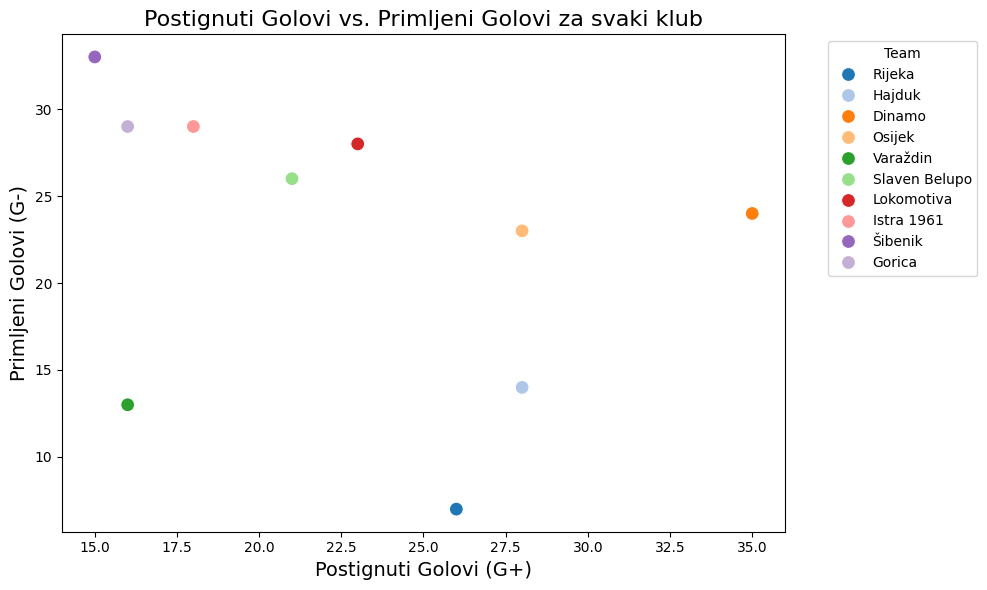

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Ljestvica.csv data
df_ljestvica = pd.read_csv("ljestvica.csv")

# Scatter plot for goals scored vs. goals conceded
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ljestvica, x='G+', y='G-', hue='Klub', palette='tab20', s=100)

# Title and axis labels
plt.title('Postignuti Golovi vs. Primljeni Golovi za svaki klub', fontsize=16)
plt.xlabel('Postignuti Golovi (G+)', fontsize=14)
plt.ylabel('Primljeni Golovi (G-)', fontsize=14)

# Show plot
plt.legend(title='Klub', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

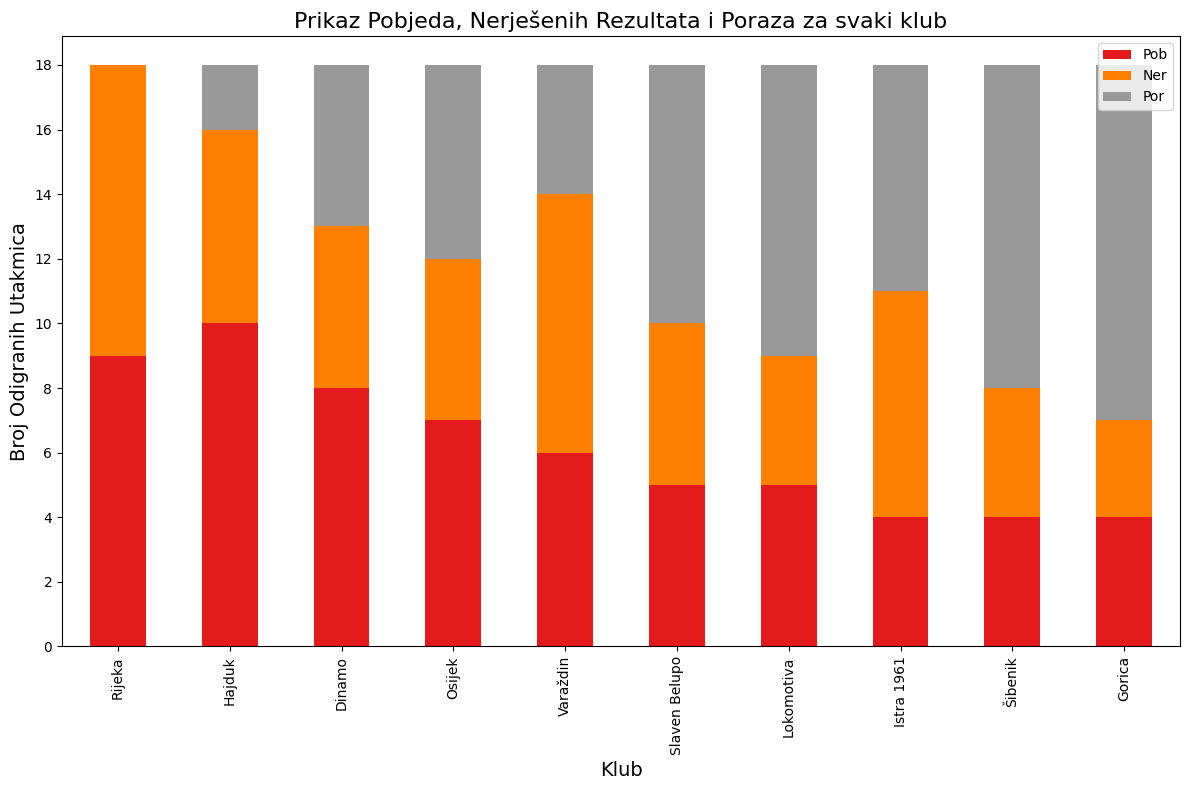

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_ljestvica = pd.read_csv("ljestvica.csv")

# Extract relevant columns: Pob (wins), Ner (draws), Por (losses)
df_team_results = df_ljestvica[['Klub', 'Pob', 'Ner', 'Por']]

# Set the 'Klub' as the index for better readability
df_team_results.set_index('Klub', inplace=True)

# Plot the stacked bar chart
ax = df_team_results.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')

# Title and axis labels
plt.title('Prikaz Pobjeda, Nerješenih Rezultata i Poraza za svaki klub', fontsize=16)
plt.xlabel('Klub', fontsize=14)
plt.ylabel('Broj Odigranih Utakmica', fontsize=14)

# Set y-axis ticks to range from 0 to the maximum count of matches (18 matches per team)
plt.yticks(range(0, 19, 2))

# Show plot
plt.tight_layout()
plt.show()

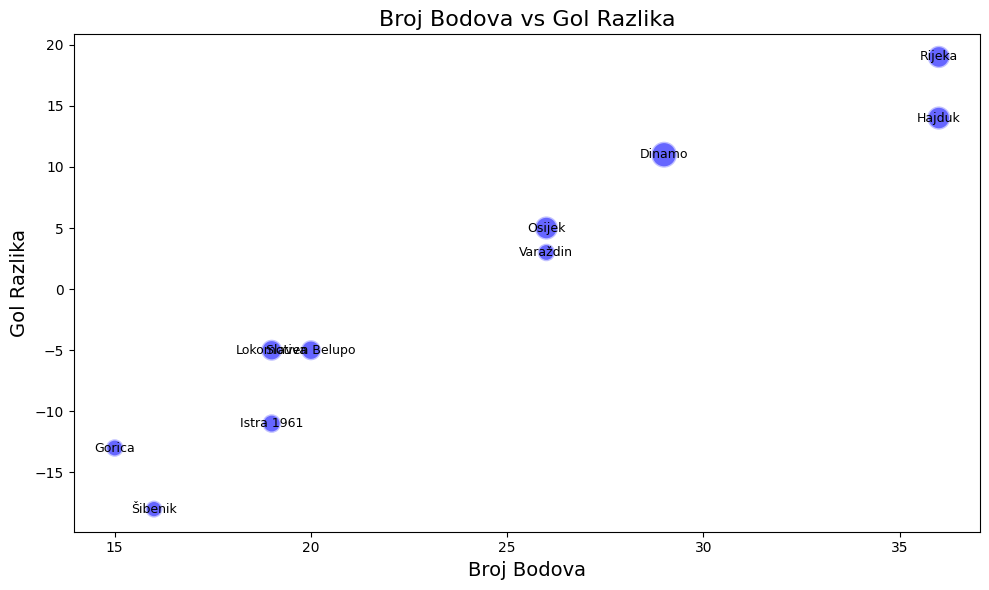

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from ljestvica.csv
df_ljestvica = pd.read_csv("Ljestvica.csv")

# Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df_ljestvica['Bod'], df_ljestvica['GR'], s=df_ljestvica['G+']*10, alpha=0.6, c='blue', edgecolors="w", linewidth=2)

# Title and axis labels
plt.title('Broj Bodova vs Gol Razlika', fontsize=16)
plt.xlabel('Broj Bodova', fontsize=14)
plt.ylabel('Gol Razlika', fontsize=14)

# Show team names as labels for each bubble
for i in range(df_ljestvica.shape[0]):
    plt.text(df_ljestvica['Bod'][i], df_ljestvica['GR'][i], df_ljestvica['Klub'][i], fontsize=9, ha='center', va='center')

# Show the plot
plt.tight_layout()
plt.show()

## Statistički prikaz rezultata odigranih utakmica

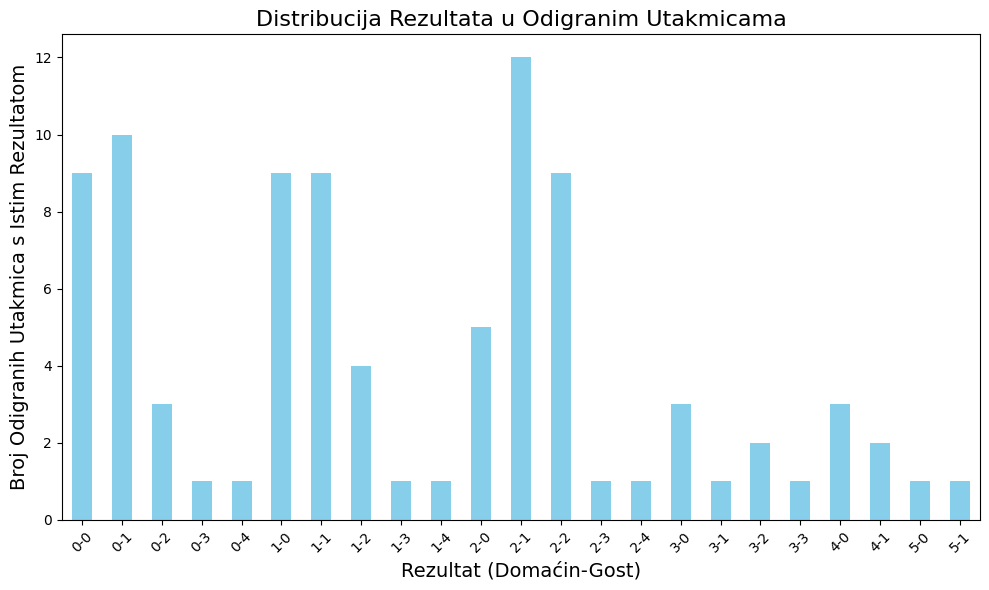

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_rezultati = pd.read_csv("Rezultati.csv")

# Create a 'Score' column representing the match score (home goals - away goals)
df_rezultati['Score'] = df_rezultati['Golovi domaćina'].astype(str) + '-' + df_rezultati['Golovi gosta'].astype(str)

# Plot histogram of score distribution (match scores)
plt.figure(figsize=(10, 6))
df_rezultati['Score'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Title and axis labels
plt.title('Distribucija Rezultata u Odigranim Utakmicama', fontsize=16)
plt.xlabel('Rezultat (Domaćin-Gost)', fontsize=14)
plt.ylabel('Broj Odigranih Utakmica s Istim Rezultatom', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

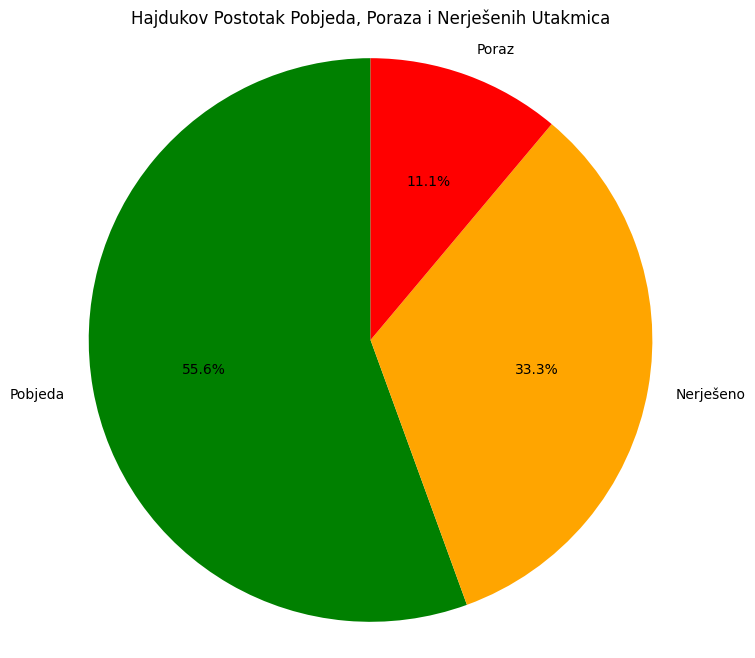

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Rezultati.csv data
df_rezultati = pd.read_csv("rezultati.csv")

# Filter rows where Hajduk is either the home or away team
hajduk_home = df_rezultati[df_rezultati['Domaćin'] == 'Hajduk']
hajduk_away = df_rezultati[df_rezultati['Gost'] == 'Hajduk']

# Concatenate the home and away matches for Hajduk
hajduk_matches = pd.concat([hajduk_home, hajduk_away])

# Count the number of wins (D), draws (N), and losses (G) for Hajduk
# For away matches, 'Pobjednik' will indicate the opposite result for Hajduk
hajduk_matches['Result'] = hajduk_matches.apply(
    lambda row: 'Pobjeda' if row['Pobjednik'] == 'D' and row['Domaćin'] == 'Hajduk' else
                'Pobjeda' if row['Pobjednik'] == 'G' and row['Gost'] == 'Hajduk' else
                'Nerješeno' if row['Pobjednik'] == 'N' else
                'Poraz',
    axis=1
)

# Count the occurrences of each result
hajduk_results = hajduk_matches['Result'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    hajduk_results, 
    labels=hajduk_results.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['green', 'orange', 'red']
)
plt.title("Hajdukov Postotak Pobjeda, Poraza i Nerješenih Utakmica")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Statistički prikaz žutih i crvenih kartona

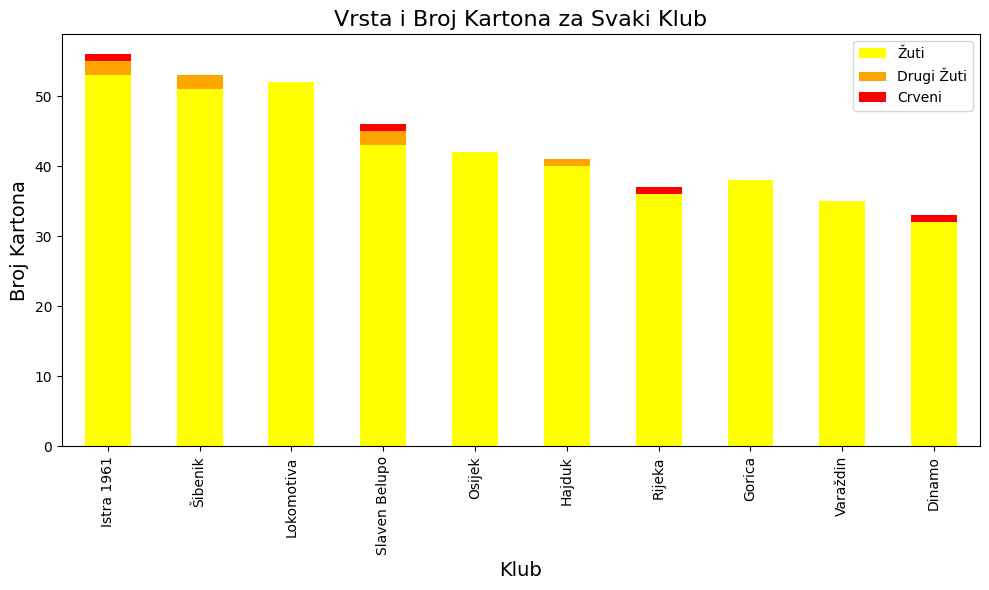

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Kartoni.csv data
df_kartoni = pd.read_csv("kartoni.csv")

# Set the team name as the index
df_kartoni.set_index('Klub', inplace=True)

# Define custom colors for the bar chart
colors = ['yellow', 'orange', 'red']

# Plot stacked bar chart for the card types with custom colors
df_kartoni[['Žuti', 'Drugi Žuti', 'Crveni']].plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Title and axis labels
plt.title('Vrsta i Broj Kartona za Svaki Klub', fontsize=16)
plt.xlabel('Klub', fontsize=14)
plt.ylabel('Broj Kartona', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

## Statistički prikaz liste najboljih strijelaca

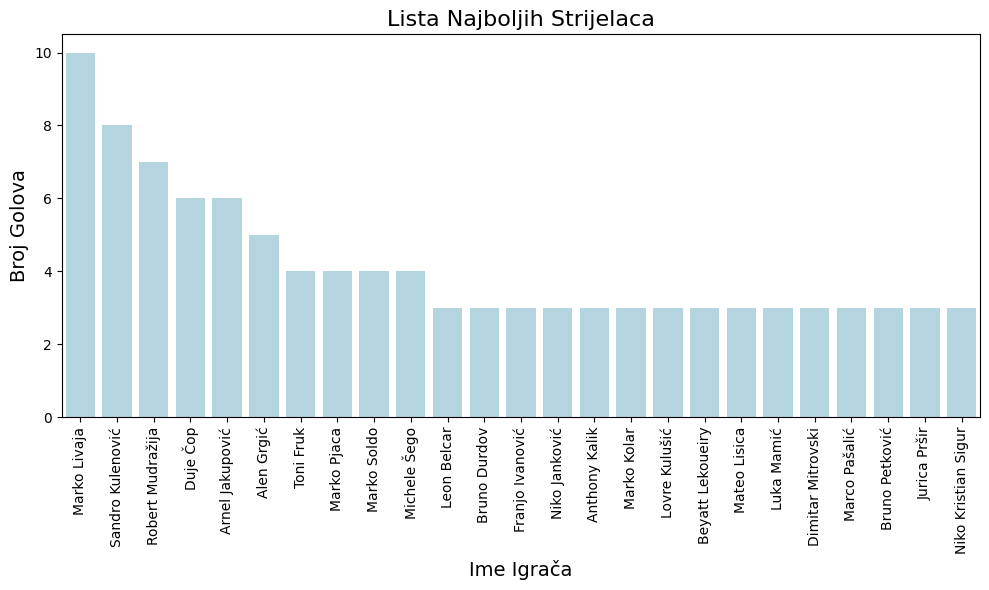

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from Strijelci.csv
df_strijelci = pd.read_csv("Strijelci.csv")

# Create a bar chart for the number of goals scored by players
plt.figure(figsize=(10, 6))
sns.barplot(data=df_strijelci, x='Ime igrača', y='Broj golova', color="lightblue")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and axis labels
plt.title('Lista Najboljih Strijelaca', fontsize=16)
plt.xlabel('Ime Igrača', fontsize=14)
plt.ylabel('Broj Golova', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

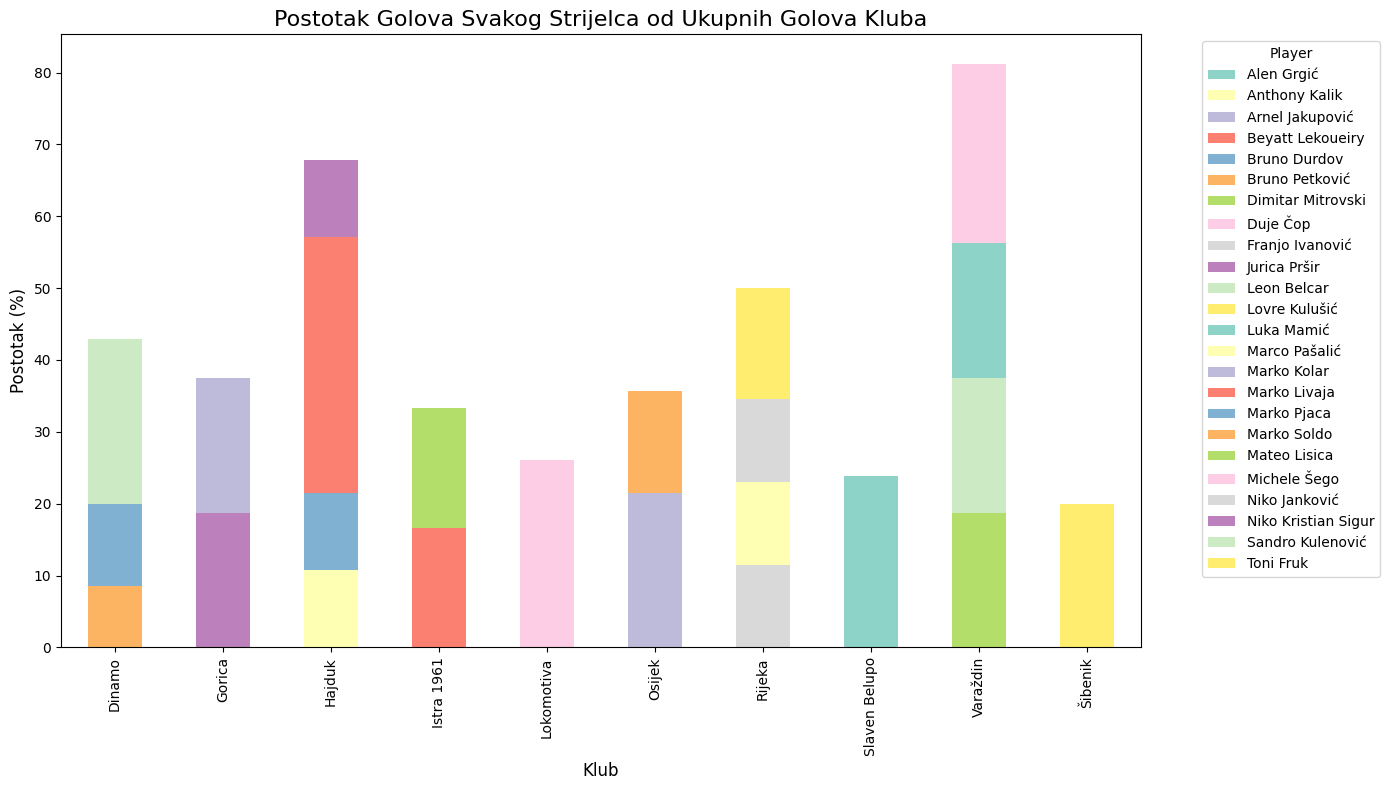

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df_strijelci = pd.read_csv("strijelci.csv")
df_ljestvica = pd.read_csv("ljestvica.csv")

# Rename relevant columns in ljestvica.csv for clarity
df_ljestvica = df_ljestvica.rename(columns={"G+": "Team Goals"})

# Merge the two dataframes on 'Klub' to include 'Team Goals' from ljestvica.csv
df = pd.merge(df_strijelci, df_ljestvica[['Klub', 'Team Goals']], on='Klub', how='inner')

# Calculate percentage contribution for each player
df['Goal Contribution (%)'] = (df['Broj golova'] / df['Team Goals']) * 100

# Pivot the data for visualization: Clubs as rows, Players as columns, and Goal Contribution (%) as values
pivot_df = df.pivot(index='Klub', columns='Ime igrača', values='Goal Contribution (%)')

# Replace NaN values with 0 and ensure numeric data
pivot_df = pivot_df.fillna(0).apply(pd.to_numeric, errors='coerce')

# Generate a list of unique colors, one for each player
colors = sns.color_palette("Set3", n_colors=pivot_df.shape[1])

# Plot the stacked bar chart
plt.figure(figsize=(14, 8))

# Plot the stacked bars for each team, using the color list for each player
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)

# Add chart details
plt.title("Postotak Golova Svakog Strijelca od Ukupnih Golova Kluba", fontsize=16)
plt.ylabel("Postotak (%)", fontsize=12)
plt.xlabel("Klub", fontsize=12)

# Adjust legend to show player names
plt.legend(title="Strijelac", bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout adjustments
plt.tight_layout()

# Show the plot
plt.show()

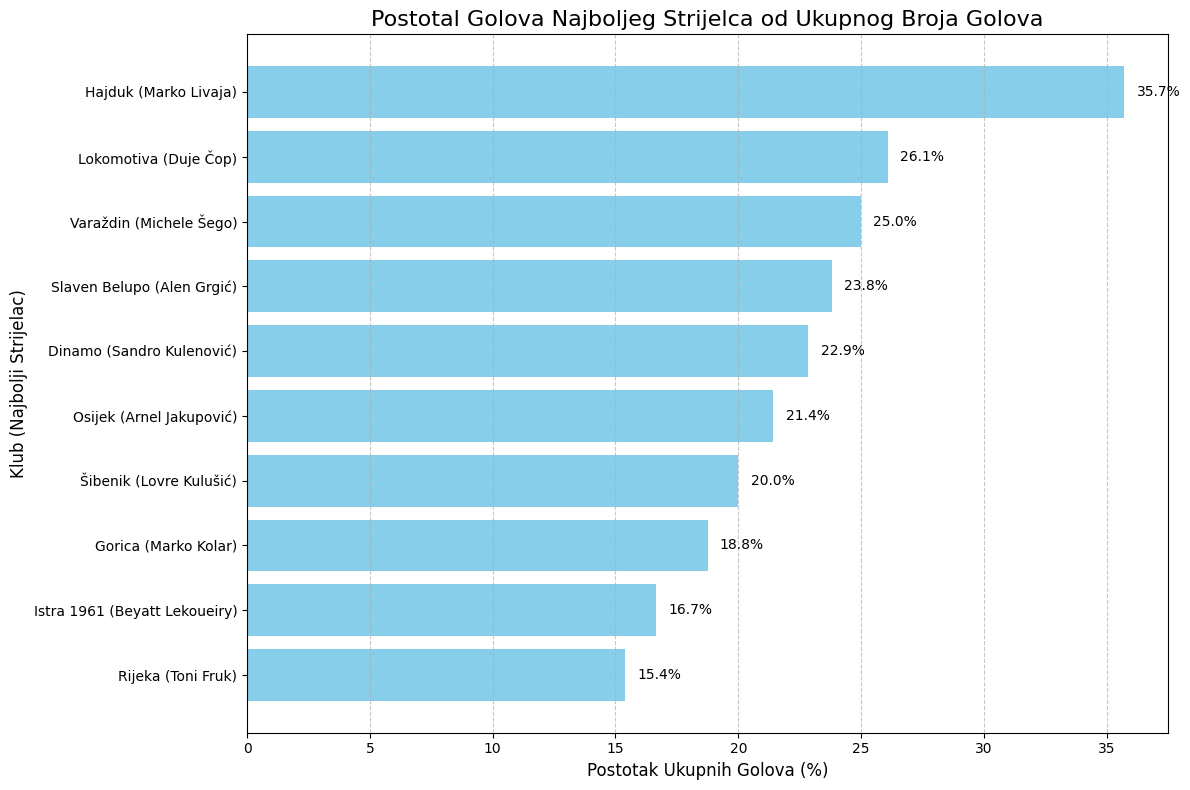

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_strijelci = pd.read_csv("strijelci.csv")
df_ljestvica = pd.read_csv("ljestvica.csv")

# Rename relevant columns in ljestvica.csv for clarity
df_ljestvica = df_ljestvica.rename(columns={"G+": "Team Goals"})

# Merge the two dataframes on 'Klub'
df = pd.merge(df_strijelci, df_ljestvica[['Klub', 'Team Goals']], on='Klub', how='inner')

# Find the top scorer for each team
top_scorers = df.loc[df.groupby('Klub')['Broj golova'].idxmax()]

# Calculate percentage contribution for the top scorer of each team
top_scorers['Top Scorer Contribution (%)'] = (top_scorers['Broj golova'] / top_scorers['Team Goals']) * 100

# Add the top scorer's name in brackets next to the team name
top_scorers['Team (Top Scorer)'] = top_scorers['Klub'] + " (" + top_scorers['Ime igrača'] + ")"

# Sort by percentage contribution
top_scorers = top_scorers.sort_values(by='Top Scorer Contribution (%)', ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_scorers['Team (Top Scorer)'], top_scorers['Top Scorer Contribution (%)'], color='skyblue')

# Add chart details
plt.title("Postotal Golova Najboljeg Strijelca od Ukupnog Broja Golova", fontsize=16)
plt.xlabel("Postotak Ukupnih Golova (%)", fontsize=12)
plt.ylabel("Klub (Najbolji Strijelac)", fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest contribution at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate percentages on the bars
for index, value in enumerate(top_scorers['Top Scorer Contribution (%)']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

## Statistički prikaz broja gledatelja na stadionima

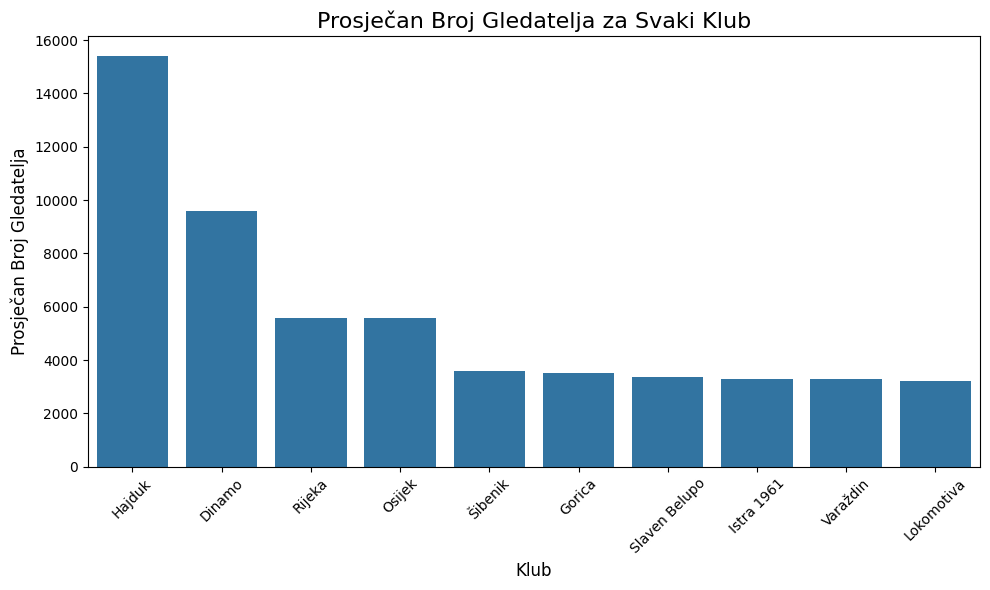

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the updated Gledatelji data
df_gledatelji = pd.read_csv("gledatelji.csv")

# Convert numeric columns to integers
df_gledatelji[["Kod Kuće", "U Gostima", "Ukupno"]] = df_gledatelji[["Kod Kuće", "U Gostima", "Ukupno"]].astype(int)

# Sort the DataFrame based on the 'Ukupno' column (Total Average Attendance)
sorted_df = df_gledatelji.sort_values(by="Ukupno", ascending=False)

# Create the sorted bar chart for total average attendance
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_df, x="Klub", y="Ukupno")

# Add chart details
plt.title("Prosječan Broj Gledatelja za Svaki Klub", fontsize=16)
plt.xlabel("Klub", fontsize=12)
plt.ylabel("Prosječan Broj Gledatelja", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Layout adjustments
plt.tight_layout()

# Show the plot
plt.show()

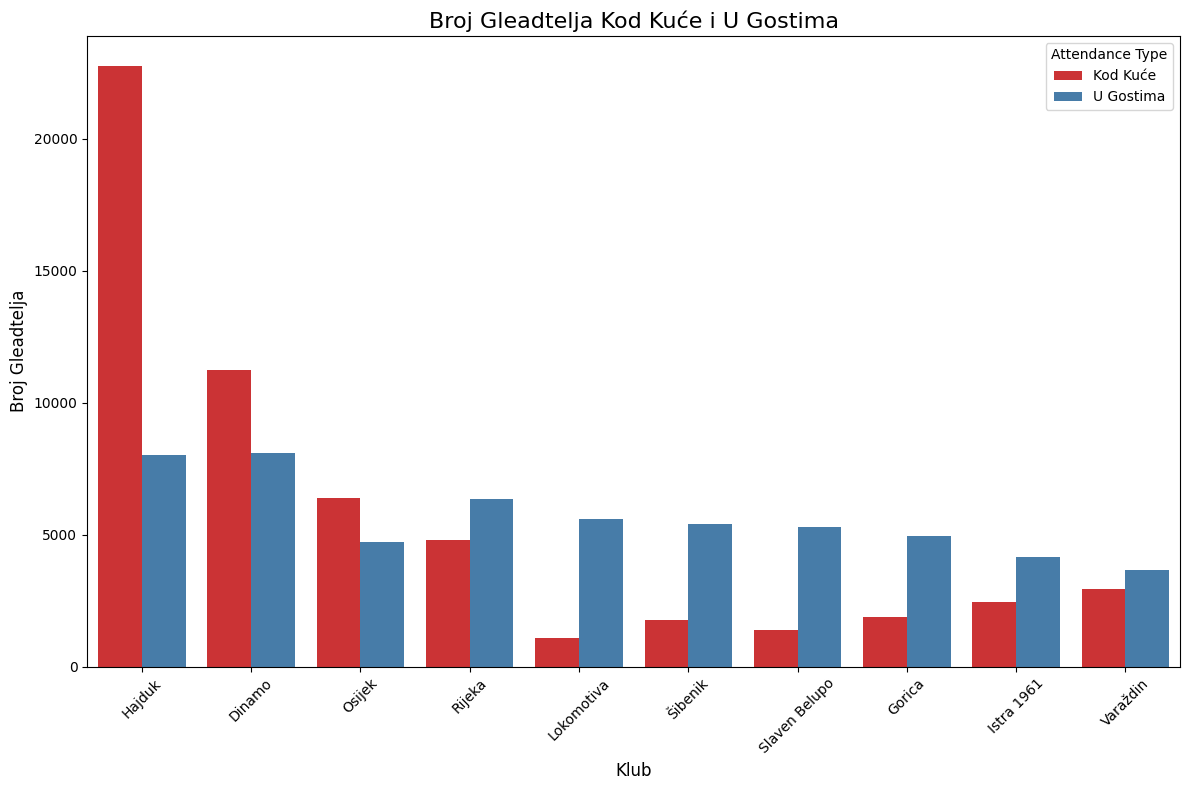

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the updated Gledatelji data
df_gledatelji = pd.read_csv("gledatelji.csv")

# Convert numeric columns to integers
df_gledatelji[["Kod Kuće", "U Gostima", "Ukupno"]] = df_gledatelji[["Kod Kuće", "U Gostima", "Ukupno"]].astype(int)

# Melt the DataFrame to reshape it for a dual bar plot
df_melted = df_gledatelji.melt(id_vars=["Klub"], value_vars=["Kod Kuće", "U Gostima"], 
                               var_name="Broj Gledatelja", value_name="Attendance")

# Sort the melted data by attendance to make sure the bars are ordered
df_melted = df_melted.sort_values(by="Attendance", ascending=False)

# Create the dual bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x="Klub", y="Attendance", hue="Attendance Type", palette="Set1")

# Add chart details
plt.title("Broj Gleadtelja Kod Kuće i U Gostima", fontsize=16)
plt.xlabel("Klub", fontsize=12)
plt.ylabel("Broj Gleadtelja", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Layout adjustments
plt.tight_layout()

# Show the plot
plt.show()

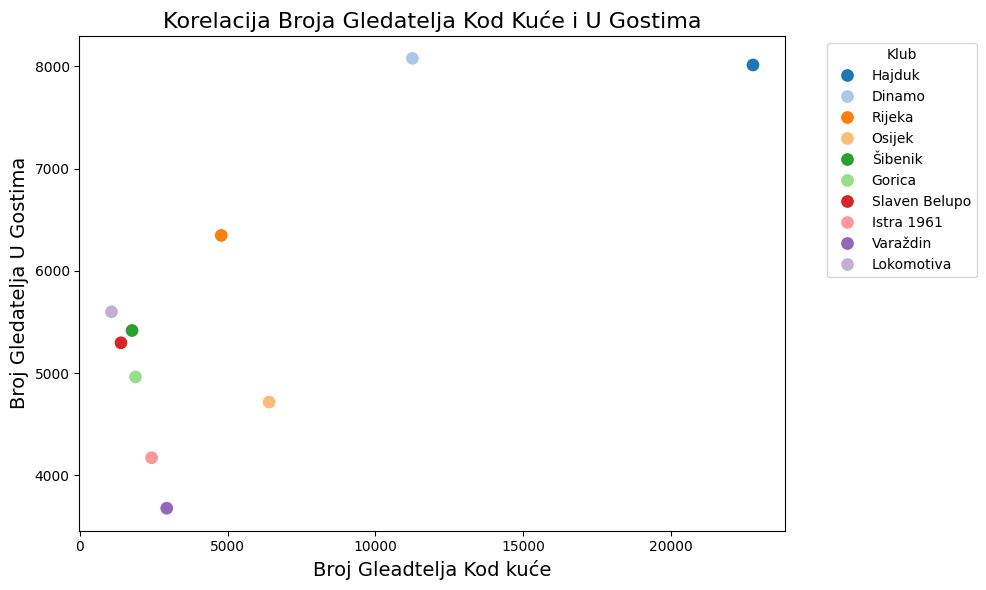

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Gledatelji.csv data
df_gledatelji = pd.read_csv("gledatelji.csv")

# Scatter plot for correlation between Home and Away Attendance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gledatelji, x='Kod Kuće', y='U Gostima', hue='Klub', palette='tab20', s=100)

# Title and axis labels
plt.title('Korelacija Broja Gledatelja Kod Kuće i U Gostima', fontsize=16)
plt.xlabel('Broj Gleadtelja Kod kuće', fontsize=14)
plt.ylabel('Broj Gledatelja U Gostima', fontsize=14)

# Show plot
plt.legend(title='Klub', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

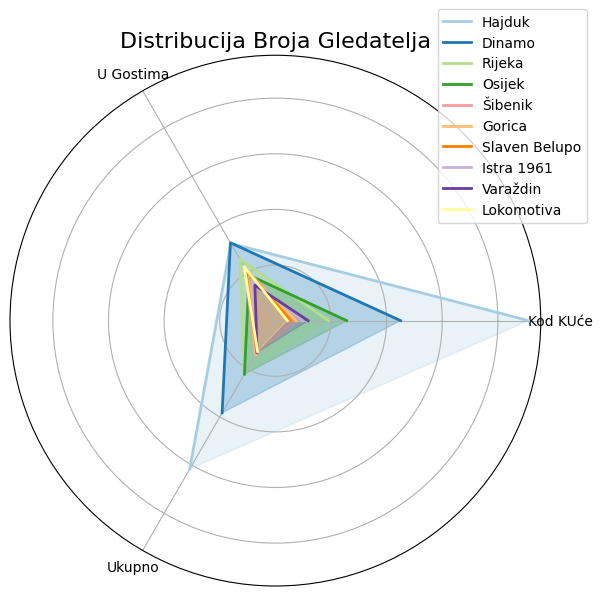

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from gledatelji.csv
df_gledatelji = pd.read_csv("Gledatelji.csv")

# Select the relevant columns for radar chart (Home, Away, and Total attendance)
teams = df_gledatelji['Klub']
home_attendance = df_gledatelji['Kod Kuće']
away_attendance = df_gledatelji['U Gostima']
total_attendance = df_gledatelji['Ukupno']

# Number of variables for the radar chart
categories = ['Kod KUće', 'U Gostima', 'Ukupno']
values = [home_attendance, away_attendance, total_attendance]

# Create a radar chart for each team
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Define the number of teams and the angles
num_teams = len(teams)
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

# Add the data for each team on the radar chart
for i, team in enumerate(teams):
    team_values = [home_attendance[i], away_attendance[i], total_attendance[i]]
    ax.fill(angles, team_values, color=plt.cm.Paired(i / num_teams), alpha=0.25)
    ax.plot(angles, team_values, color=plt.cm.Paired(i / num_teams), linewidth=2, label=team)

# Set the labels for the categories
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(categories)

# Add a title
ax.set_title('Distribucija Broja Gledatelja', size=16)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Display the radar chart
plt.tight_layout()
plt.show()